In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
df=pd.read_csv('./nombre_depanes_par_jour.csv', encoding='latin-1',sep=";",index_col="Date début", parse_dates=True)

In [3]:


df.head()


,Number of Orders
Date début,
2019-01-01,9.0
2019-01-02,9.0
2019-01-03,15.0
2019-01-04,8.0
2019-01-05,7.0


In [4]:
df.rename(columns = {'Number of Orders':'orders'}, inplace = True)


In [5]:
msk=(df.index<'2021-07-30')
df_train=df[msk].copy()
df_test=df[~msk].copy()

In [6]:
x_train=df_train.drop(['orders'], axis=1)

In [7]:
x_test=df_test.drop(['orders'], axis=1)

In [8]:
y_train=df_train['orders']

In [9]:
y_test=df_test['orders']

In [10]:
df.head()

,orders
Date début,
2019-01-01,9.0
2019-01-02,9.0
2019-01-03,15.0
2019-01-04,8.0
2019-01-05,7.0


In [11]:
df.isnull().sum()

orders    0
dtype: int64

In [12]:
ses= SimpleExpSmoothing(np.asarray(y_train))

In [13]:
ses_fit=ses.fit(optimized=True)

In [14]:
y_pred= ses_fit.forecast(len(df_test))

In [15]:
df['forecast_ses'] = [None]*len(df_train) + list(y_pred)

<AxesSubplot:xlabel='Date début'>

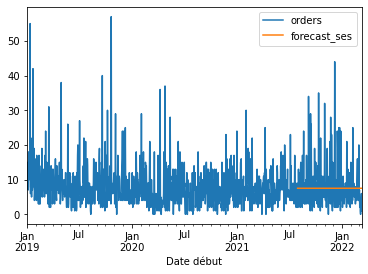

In [16]:
df.plot()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
mae = mean_absolute_error(y_test,y_pred)
r2= r2_score( y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'mae - ses: {mae}')
print(f'r2 - ses: {r2}')
print(f'rmse - ses: {rmse}')

mae - auto: 4.51873827846694
r2 - auto: -0.03255377380518998
rmse - auto: 6.935344820695134
